### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
         '#bcbd22', '#17becf', '#ffbb78']

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Nessa primeira etapa optei por juntar os dados de todas as lojas em um único dataframe, para facilitar a análise.
loja['id_loja'] = '1'
loja2['id_loja'] = '2'
loja3['id_loja'] = '3'
loja4['id_loja'] = '4'

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,id_loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


#1. Análise do faturamento


## Analise via pandas

In [ ]:
#Agora vou filtrar só oque vou utilizar, a soma de preço por loja, e o id da loja.
faturamento = df.groupby(['id_loja'])['Preço'].sum().reset_index()

#Adicionando o id da loja como index, e transformando em dicionário para facilitar a representação grafica com matplotlib.
faturamento_dic = faturamento.set_index('id_loja').to_dict()['Preço']
faturamento_dic

for loja, valor in faturamento_dic.items():
    print(f'A loja {loja} teve um faturamento de R$ {valor:.2f}')

A loja 1 teve um faturamento de R$ 1534509.12
A loja 2 teve um faturamento de R$ 1488459.06
A loja 3 teve um faturamento de R$ 1464025.03
A loja 4 teve um faturamento de R$ 1384497.58


## Grafico

In [ ]:
faturamento_por_loja = faturamento
# Gráfico de Barras
fig_barras = px.bar(
    faturamento_por_loja,
    x='id_loja',
    y='Preço',
    color='id_loja',  # Adicionado aqui
    color_discrete_sequence=cores,
    text=faturamento_por_loja['Preço'].apply(lambda x: f'R${x:,.2f}')
)


fig_barras.update_traces(textposition='outside', marker_line_color='black', marker_line_width=1)

fig_barras.update_layout(
    title='Faturamento por loja',
    xaxis_title='Nº da Loja',
    yaxis_title='Faturamento em Milhões (R$)',
    yaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=False),
    uniformtext_minsize=3,
    uniformtext_mode='hide'
)
fig_barras.show()

# 2. Vendas por Categoria


## Analise via pandas

In [ ]:
# A ideia agora é saber quantos produtos foram vendidos por loja, e por categoria.
vendas_categoria = df.groupby(['id_loja', 'Categoria do Produto'])['Produto'].size().reset_index()
# Novamente convertendo o resultado em dicionário para facilitar a representação grafica com matplotlib.
vendas_categoria_dic = vendas_categoria.set_index(['id_loja', 'Categoria do Produto']).to_dict()['Produto']
print(vendas_categoria_dic)

{('1', 'brinquedos'): 324, ('1', 'eletrodomesticos'): 312, ('1', 'eletronicos'): 448, ('1', 'esporte e lazer'): 284, ('1', 'instrumentos musicais'): 182, ('1', 'livros'): 173, ('1', 'moveis'): 465, ('1', 'utilidades domesticas'): 171, ('2', 'brinquedos'): 313, ('2', 'eletrodomesticos'): 305, ('2', 'eletronicos'): 422, ('2', 'esporte e lazer'): 275, ('2', 'instrumentos musicais'): 224, ('2', 'livros'): 197, ('2', 'moveis'): 442, ('2', 'utilidades domesticas'): 181, ('3', 'brinquedos'): 315, ('3', 'eletrodomesticos'): 278, ('3', 'eletronicos'): 451, ('3', 'esporte e lazer'): 277, ('3', 'instrumentos musicais'): 177, ('3', 'livros'): 185, ('3', 'moveis'): 499, ('3', 'utilidades domesticas'): 177, ('4', 'brinquedos'): 338, ('4', 'eletrodomesticos'): 254, ('4', 'eletronicos'): 451, ('4', 'esporte e lazer'): 277, ('4', 'instrumentos musicais'): 170, ('4', 'livros'): 187, ('4', 'moveis'): 480, ('4', 'utilidades domesticas'): 201}


## Grafico


In [ ]:
vendas_categoria_df = pd.DataFrame(list(vendas_categoria_dic.items()), columns=['Loja e Categoria', 'Vendas'])

vendas_categoria_df[['id_loja', 'Categoria do Produto']] = pd.DataFrame(
    vendas_categoria_df['Loja e Categoria'].to_list(), index=vendas_categoria_df.index)

vendas_categoria_df.drop(columns='Loja e Categoria', inplace=True)

fig = px.bar(vendas_categoria_df,
             x='id_loja',
             y='Vendas',
             color='Categoria do Produto',
             title='Quantidade de Produtos Vendidos por Loja e Categoria',
             labels={'id_loja': 'Loja', 'Vendas': 'Quantidade de Produtos Vendidos'},
             category_orders={'id_loja': ['1', '2', '3', '4']})

fig.update_traces(text=vendas_categoria_df['Vendas'], textposition='inside', texttemplate='%{text}')

fig.show()

# 3. Média de Avaliação das Lojas

## Analise com pandas


In [ ]:
avaliacao = df.groupby(['id_loja'])['Avaliação da compra'].mean().reset_index()
avaliacao_dic = avaliacao.set_index('id_loja').to_dict()['Avaliação da compra']

for loja, nota in avaliacao_dic.items():
    print(f'A loja {loja} teve uma avaliação média de {nota:.2f} estrelas.')

A loja 1 teve uma avaliação média de 3.98 estrelas.
A loja 2 teve uma avaliação média de 4.04 estrelas.
A loja 3 teve uma avaliação média de 4.05 estrelas.
A loja 4 teve uma avaliação média de 4.00 estrelas.


## Grafico

In [ ]:
avaliacao_df = pd.DataFrame(list(avaliacao_dic.items()), columns=['id_loja', 'Avaliação Média'])

avaliacao_df['id_loja'] = avaliacao_df['id_loja'].astype(str)

fig = px.bar(
    avaliacao_df,
    x='Avaliação Média',
    y='id_loja',
    orientation='h',
    color='id_loja',
    text='Avaliação Média',
    title='Avaliação Média por Loja',
    labels={'id_loja': 'Loja', 'Avaliação Média': 'Nota Média'}
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.update_layout(
    xaxis=dict(range=[0, 5]),
)

fig.show()

# 4. Produtos Mais e Menos Vendidos

## Analise com pandas

In [ ]:
rank_produtos = df.groupby(['id_loja', 'Produto'])['Categoria do Produto'].count().reset_index(name='Quantidade').sort_values(['id_loja', 'Quantidade'], ascending=[True, False])
print(rank_produtos)

mais_vendidos = rank_produtos.groupby('id_loja').head(5).reset_index(drop=True)
print(mais_vendidos)

menos_vendidos = rank_produtos.groupby('id_loja').tail(5).reset_index(drop=True)
print(menos_vendidos)


    id_loja             Produto  Quantidade
24        1       Guarda roupas          60
37        1         Micro-ondas          60
47        1       TV Led UHD 4K          60
43        1  Secadora de roupas          58
3         1    Blocos de montar          56
..      ...                 ...         ...
176       4           Geladeira          38
187       4  Lavadora de roupas          38
202       4              Violão          37
177       4       Guarda roupas          34
178       4            Guitarra          33

[204 rows x 3 columns]
   id_loja                   Produto  Quantidade
0        1             Guarda roupas          60
1        1               Micro-ondas          60
2        1             TV Led UHD 4K          60
3        1        Secadora de roupas          58
4        1          Blocos de montar          56
5        2  Iniciando em programação          65
6        2               Micro-ondas          62
7        2                   Bateria          61
8      

## Grafico


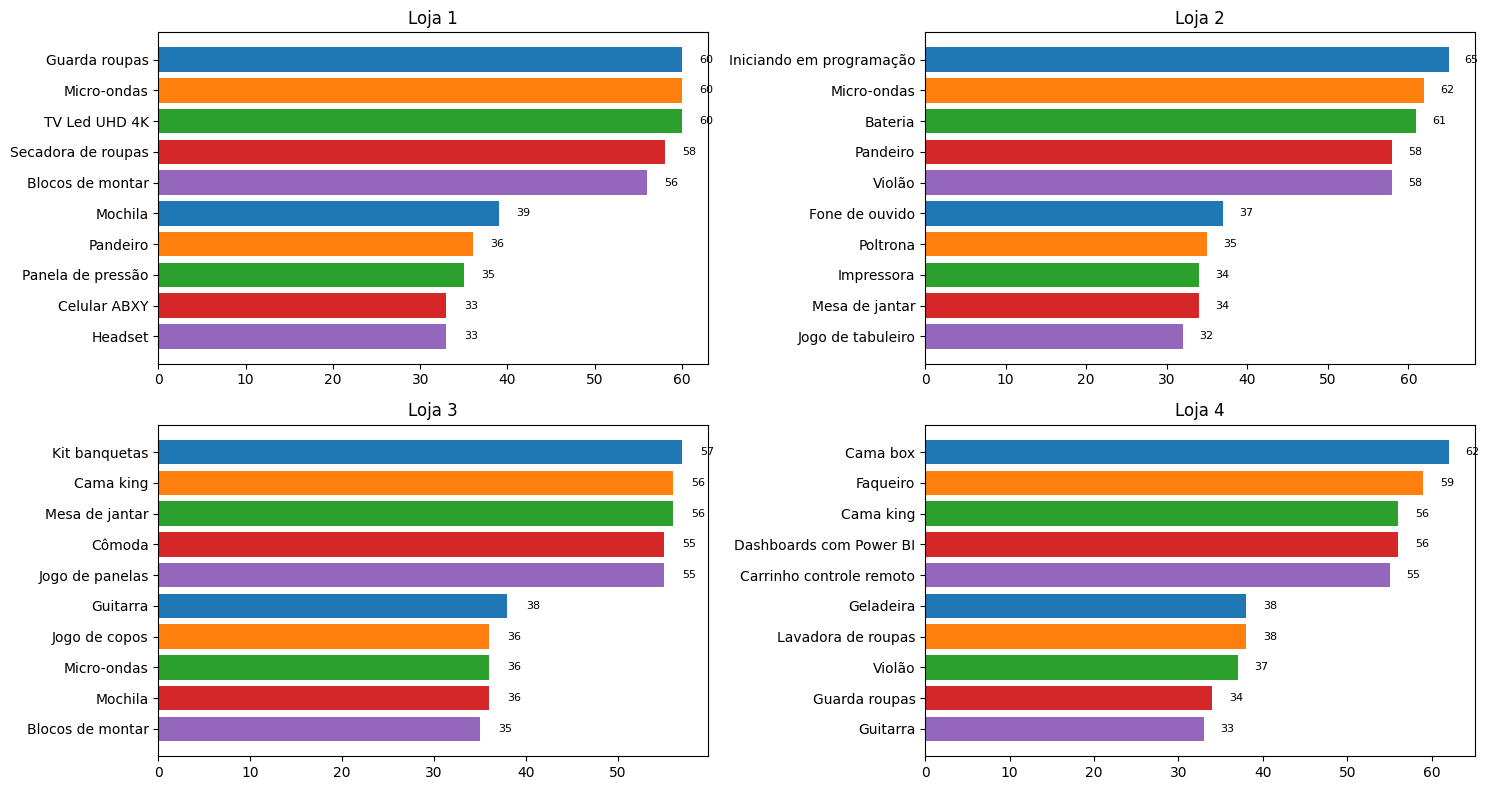

In [ ]:
lojas = sorted(df['id_loja'].unique())

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()

for i, loja in enumerate(lojas):
    ax = axs[i]

    # Dados da loja atual
    top = mais_vendidos[mais_vendidos['id_loja'] == loja]
    bottom = menos_vendidos[menos_vendidos['id_loja'] == loja]

    # Plotar os mais vendidos
    ax.barh(top['Produto'], top['Quantidade'], color=cores, label='Mais vendidos')

    # Plotar os menos vendidos
    ax.barh(bottom['Produto'], bottom['Quantidade'], color=cores, label='Menos vendidos')

    ax.set_title(f'Loja {loja}')
    ax.invert_yaxis()
    for index, row in top.iterrows():
        ax.text(row['Quantidade'] + 2, row['Produto'], str(row['Quantidade']), va='center', fontsize=8)
    for index, row in bottom.iterrows():
        ax.text(row['Quantidade'] + 2, row['Produto'], str(row['Quantidade']), va='center', fontsize=8)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


## Analise com pandas

In [ ]:
frete = df.groupby(['id_loja'])['Frete'].mean().reset_index()
frete_dic = frete.set_index('id_loja').to_dict()['Frete']

for loja, valor in frete_dic.items():
    print(f'A loja {loja} teve um frete médio de R$ {valor:.2f}')

A loja 1 teve um frete médio de R$ 34.69
A loja 2 teve um frete médio de R$ 33.62
A loja 3 teve um frete médio de R$ 33.07
A loja 4 teve um frete médio de R$ 31.28


## Grafico


In [ ]:
df_frete = pd.DataFrame(list(frete_dic.items()), columns=['Loja', 'Frete Médio'])

fig = px.scatter(
    df_frete,
    x='Frete Médio',
    y='Loja',
    size=[10]*len(df_frete),
    color='Loja',
    title='Frete Médio por Loja',
    labels={'Frete Médio': 'Valor do Frete Médio (R$)'}
)

fig.update_traces(marker=dict(symbol='circle', opacity=0.7))
fig.update_layout(showlegend=False)

fig.show()

# **Relatório de Análise de Vendas de Lojas**

O objetivo deste relatório é analisar o desempenho das quatro lojas distintas, a fim de determinar qual delas o Senhor João deveria optar por vender.

A decisão será baseada em diversos critérios, incluindo o faturamento total, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos, e o frete médio de cada loja. Através da análise desses fatores, buscamos identificar a melhor opção para que o Senhor João venda.


# **Faturamento Total das Lojas**

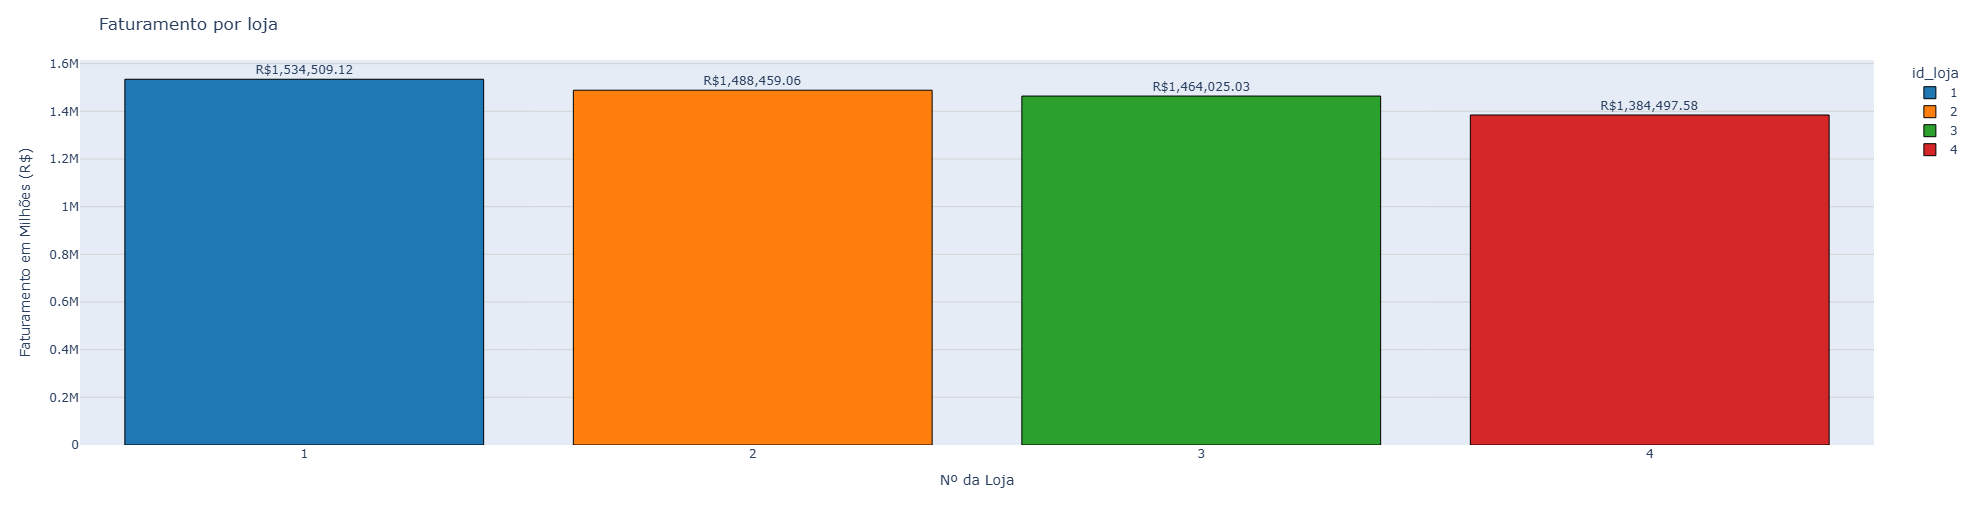




# **Avaliação média**

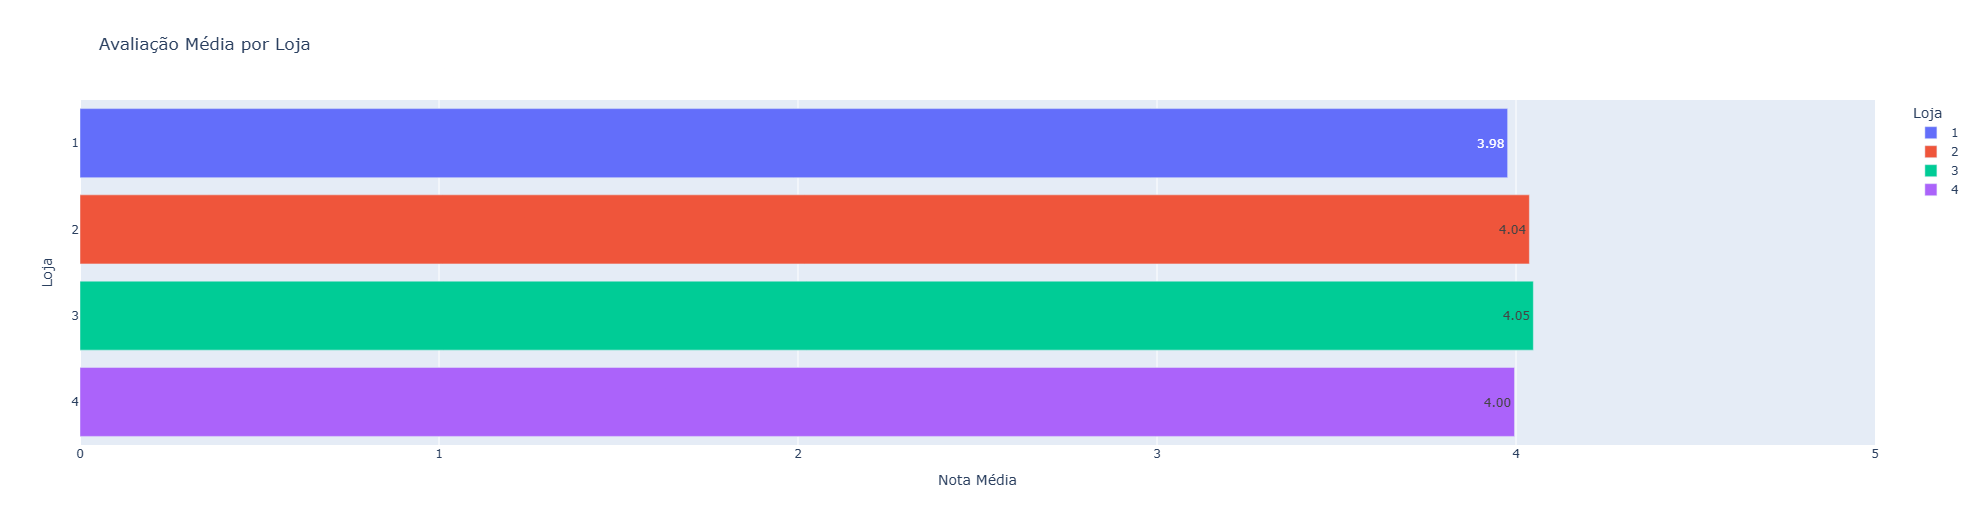

# **Frete médio das Lojas**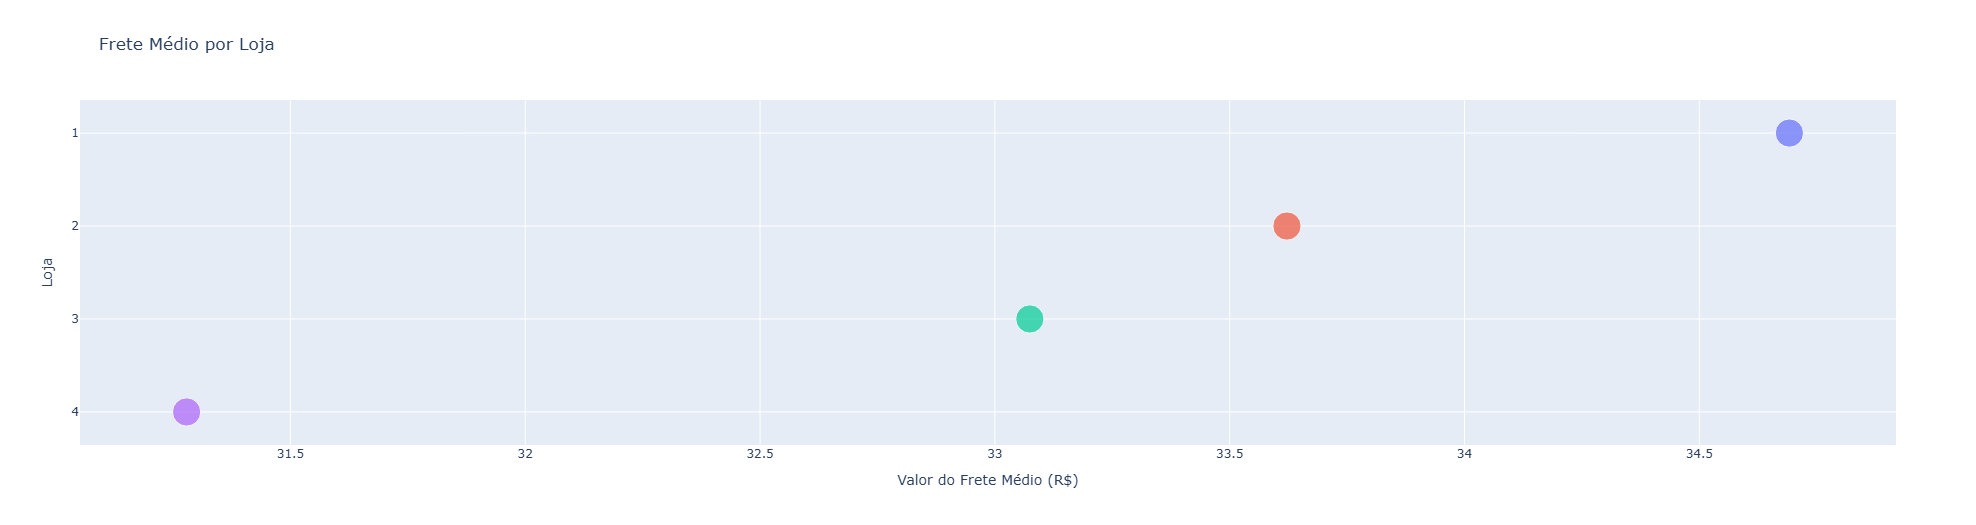

A loja 1 é a que mais gera receita, embora sua avaliação seja a pior tem um mix de produto e receita consistente. E as lojas 2 e 3 possuem faturamentos semelhantes.

A loja 4 possui o frete mais competitivo em termos de valor, no entanto esse ponto positivo não se converte em volume de vendas, avaliação ou receita semelhante ou superior as demais lojas.

# Recomendação de venda:
## Loja 4

A Loja 4 apresenta o pior desempenho geral, com baixa movimentação de vendas, menor receita e apenas avaliação razoável. Embora tenha custo logístico mais baixo, não há indícios de que essa vantagem seja suficiente para alavancar o desempenho geral da unidade. Sua alienação permitiria realocar recursos para lojas com maior capacidade de geração de valor.